In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Accepted_data = pd.read_csv("/content/drive/MyDrive/kaggle/accepted_2007_to_2018Q4.csv") 
Accepted_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Accepted_data.shape

(2260701, 151)

In [6]:
Accepted_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [7]:
Accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [8]:
Accepted_data['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [9]:
Accepted_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


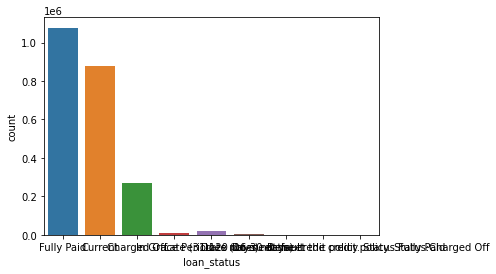

In [10]:
sns.countplot(Accepted_data.loan_status)

In [11]:
Accepted_data = Accepted_data.loc[Accepted_data['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [12]:
Accepted_data.shape

(1345310, 151)

In [13]:
Accepted_data['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [14]:

Accepted_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          1345310 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   1345310 non-null  float64
 3   funded_amnt                                 1345310 non-null  float64
 4   funded_amnt_inv                             1345310 non-null  float64
 5   term                                        1345310 non-null  object 
 6   int_rate                                    1345310 non-null  float64
 7   installment                                 1345310 non-null  float64
 8   grade                                       1345310 non-null  object 
 9   sub_grade                                   1345310 non-

In [15]:
Accepted_data['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

In [16]:
missing_fractions = Accepted_data.isnull().mean().sort_values(ascending=False)

In [17]:
missing_fractions.head(25)

member_id                                     1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_start_date                           0.995723
hardship_end_date                             0.995723
payment_plan_start_date                       0.995723
hardship_length                               0.995723
hardship_dpd                                  0.995723
hardship_loan_status                          0.995723
hardship_last_payment_amount                  0.995723
hardship_payoff_balance_amount                0.995723
hardship_amount                               0.995723
hardship_status                               0.995723
hardship_reason                               0.995723
hardship_type                                 0.995723
deferral_term                                 0.995723
sec_app_mths_since_last_major_derog           0.995061
sec_app_revol_util                            0.986396
revol_bal_

Text(0, 0.5, 'Feature count')

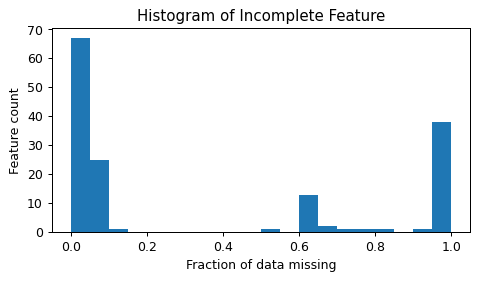

In [18]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Incomplete Feature')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [19]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [20]:

len(drop_list)

58

In [21]:
Accepted_data.drop(labels=drop_list, axis=1, inplace=True)

In [22]:
Accepted_data.shape

(1345310, 93)

In [23]:
print(sorted(Accepted_data.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

In [24]:
Accepted_data['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [25]:
Accepted_data['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [26]:
Accepted_data.head().T

,0,1,2,4,5
id,68407277,68355089,68341763,68476807,68426831
loan_amnt,3600,24700,20000,10400,11950
funded_amnt,3600,24700,20000,10400,11950
funded_amnt_inv,3600,24700,20000,10400,11950
term,36 months,36 months,60 months,60 months,36 months
...,...,...,...,...,...
total_bc_limit,2400,79300,6200,20300,9400
total_il_high_credit_limit,13734,24667,14877,88097,4000
hardship_flag,N,N,N,N,N
disbursement_method,Cash,Cash,Cash,Cash,Cash


In [27]:
pd.options.display.max_rows = 93

In [28]:
Accepted_data.head(3).T

,0,1,2
id,68407277,68355089,68341763
loan_amnt,3600,24700,20000
funded_amnt,3600,24700,20000
funded_amnt_inv,3600,24700,20000
term,36 months,36 months,60 months
int_rate,13.99,11.99,10.78
installment,123.03,820.28,432.66
grade,C,C,B
sub_grade,C4,C1,B4
emp_title,leadman,Engineer,truck driver


In [29]:
keep_list = ['funded_amnt','addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pymnt_plan', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [30]:
len(keep_list)

33

In [31]:
drop_list = [col for col in Accepted_data.columns if col not in keep_list]
print(drop_list)

['funded_amnt_inv', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi

In [32]:
len(drop_list)

60

In [33]:
Accepted_data.drop(labels=drop_list, axis=1, inplace=True)

In [34]:
Accepted_data.shape

(1345310, 33)

**PRE PROCESSING OF ACCEPTED DATA**

In [35]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(Accepted_data.loc[Accepted_data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(Accepted_data[col_name], order=sorted(Accepted_data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=Accepted_data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = Accepted_data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [36]:
print(list(Accepted_data.columns))

['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


**ID**

In [37]:
#deep copy of the data created
df_copy = Accepted_data.copy(deep= True)

In [38]:
Accepted_data['id'].sample(5)

1769616      8994633
759798     140723505
1080039     70301588
1258170     18824985
1164523     31347274
Name: id, dtype: object

In [39]:
Accepted_data['id'].describe()

count      1345310
unique     1345310
top       83886078
freq             1
Name: id, dtype: int64

In [40]:
Accepted_data.drop('id', axis=1, inplace=True)

**Loan_amt**

In [41]:
Accepted_data['loan_amnt'].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


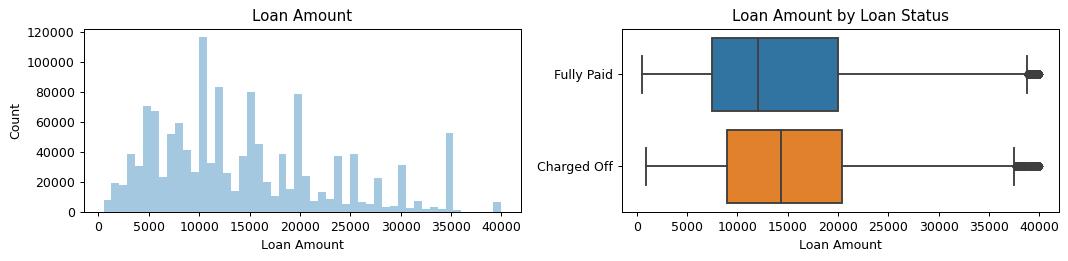

In [42]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [43]:
Accepted_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


**Term**

In [44]:
Accepted_data['term'].value_counts(dropna=False)

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

In [45]:
Accepted_data['term'] = Accepted_data['term'].apply(lambda s: np.int8(s.split()[0]))

In [46]:
Accepted_data['term'].value_counts(normalize=True)

36    0.758742
60    0.241258
Name: term, dtype: float64

In [47]:
Accepted_data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.159934
60    0.324454
Name: loan_status, dtype: float64

**int_rate**

In [48]:
Accepted_data['int_rate'].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


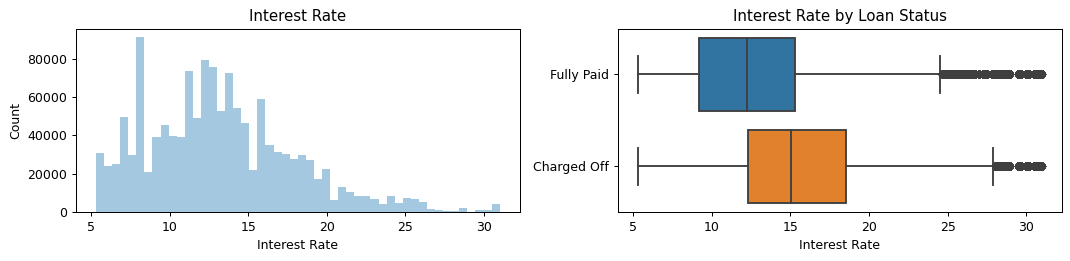

In [49]:
plot_var('int_rate', 'Interest Rate', continuous=True)

In [50]:
Accepted_data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15.710714,4.910387,5.31,12.29,15.05,18.55,30.99
Fully Paid,1076751.0,12.623288,4.527227,5.31,9.17,12.23,15.31,30.99


**Installment**

In [51]:
Accepted_data['installment'].describe()

count    1.345310e+06
mean     4.380755e+02
std      2.615126e+02
min      4.930000e+00
25%      2.484800e+02
50%      3.754300e+02
75%      5.807300e+02
max      1.719830e+03
Name: installment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


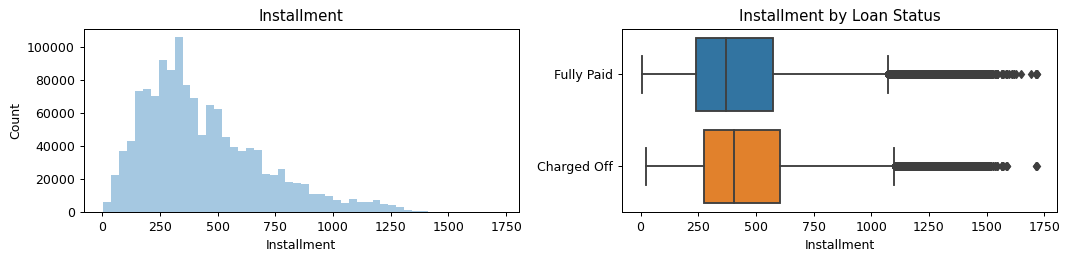

In [52]:
plot_var('installment', 'Installment', continuous=True)

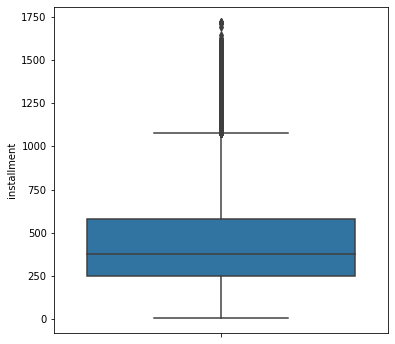

In [53]:
plt.figure(figsize=(6,6))
sns.boxplot( y=df_copy['installment'] )

In [54]:
Accepted_data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,465.147994,262.774106,21.62,275.29,402.83,605.31,1717.63
Fully Paid,1076751.0,431.323226,260.759563,4.93,240.92,368.26,573.06,1719.83


**Grade and sub-grade**

In [55]:
print(sorted(Accepted_data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [56]:
print(sorted(Accepted_data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [57]:
Accepted_data.drop('grade', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


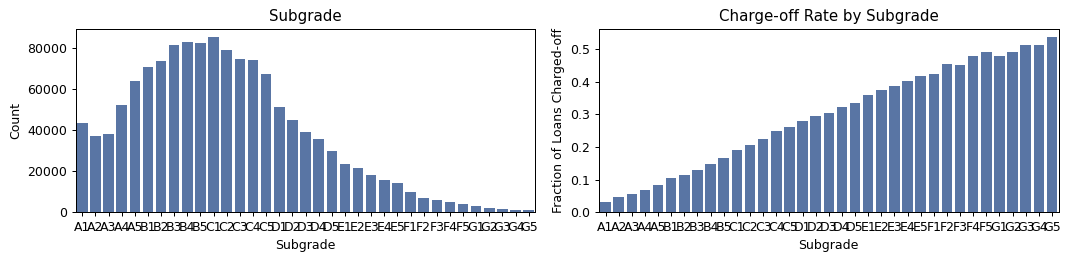

In [58]:
plot_var('sub_grade', 'Subgrade', continuous=False)

**Emp_title**

In [59]:
Accepted_data['emp_title'].describe()

count     1259525
unique     378353
top       Teacher
freq        21268
Name: emp_title, dtype: object

**emp_length**

In [60]:
Accepted_data['emp_length'].value_counts(dropna=False).sort_index()

1 year        88494
10+ years    442199
2 years      121743
3 years      107597
4 years       80556
5 years       84154
6 years       62733
7 years       59624
8 years       60701
9 years       50937
< 1 year     108061
NaN           78511
Name: emp_length, dtype: int64

In [61]:
Accepted_data['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [62]:
Accepted_data['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [63]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [64]:
Accepted_data['emp_length'] = Accepted_data['emp_length'].apply(emp_length_to_int)

In [65]:
Accepted_data['emp_length'].value_counts(dropna=False).sort_index()

0.0     108061
1.0      88494
2.0     121743
3.0     107597
4.0      80556
5.0      84154
6.0      62733
7.0      59624
8.0      60701
9.0      50937
10.0    442199
NaN      78511
Name: emp_length, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


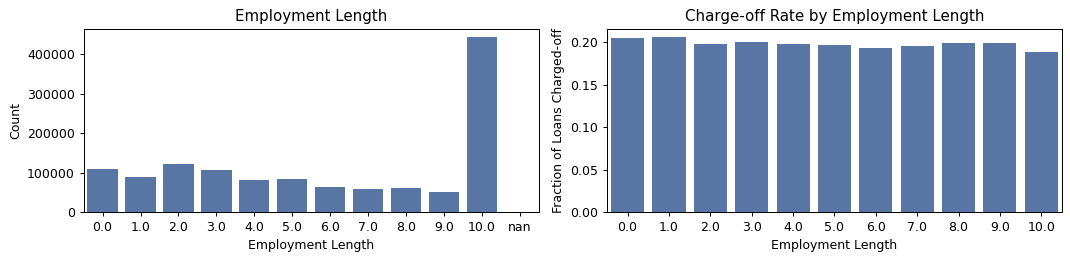

In [66]:
plot_var('emp_length', 'Employment Length', continuous=False)

**home_ownership**

In [67]:
Accepted_data.home_ownership.value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [68]:
Accepted_data.loc[(Accepted_data.home_ownership == 'ANY') | (Accepted_data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
Accepted_data.home_ownership.value_counts()

MORTGAGE    665579
RENT        534421
OWN         144832
OTHER          478
Name: home_ownership, dtype: int64

**term,home_ownership,verification_status**

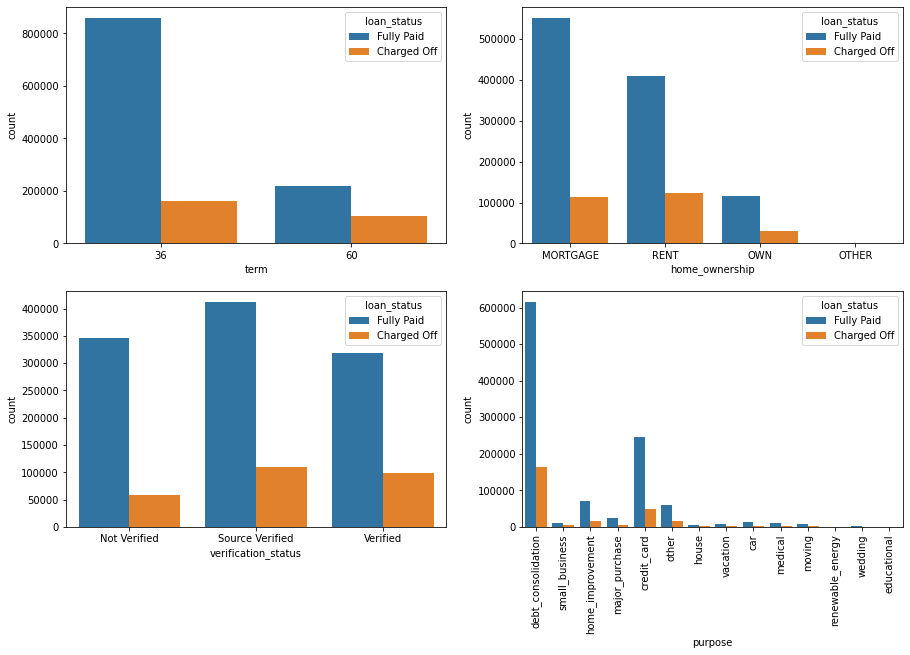

In [69]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=Accepted_data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=Accepted_data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=Accepted_data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=Accepted_data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [70]:
Accepted_data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.172077
OTHER       0.188285
OWN         0.206198
RENT        0.232165
Name: loan_status, dtype: float64

**Annual_income**

In [71]:
Accepted_data['annual_inc'].describe()

count    1.345310e+06
mean     7.624764e+04
std      6.992510e+04
min      0.000000e+00
25%      4.578000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [72]:
Accepted_data['log_annual_inc'] = Accepted_data['annual_inc'].apply(lambda x: np.log10(x+1))

In [73]:
Accepted_data.drop('annual_inc', axis=1, inplace=True)

In [74]:
Accepted_data['log_annual_inc'].describe()

count    1.345310e+06
mean     4.812814e+00
std      2.477200e-01
min      0.000000e+00
25%      4.660685e+00
50%      4.812920e+00
75%      4.954247e+00
max      7.041361e+00
Name: log_annual_inc, dtype: float64

Text(0.5, 0, 'log_annual_inc')

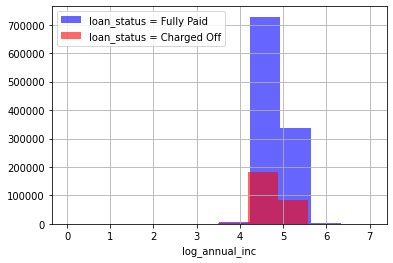

In [75]:
plt.subplot(1, 1, 1)
Accepted_data[Accepted_data["loan_status"] == "Fully Paid"]["log_annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
Accepted_data[Accepted_data["loan_status"] == "Charged Off"]["log_annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("log_annual_inc")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


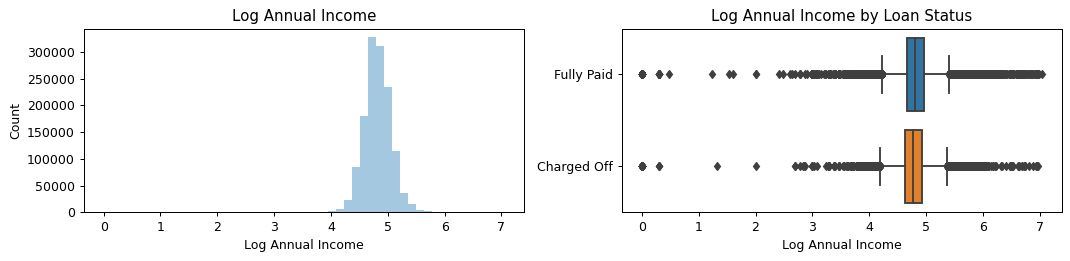

In [76]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

In [77]:
Accepted_data.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,4.781756,0.241984,0.0,4.633479,4.778158,4.929424,6.977724
Fully Paid,1076751.0,4.820560,0.248526,0.0,4.672107,4.812920,4.968488,7.041361


**issue_d, earliest_cr_line**

In [78]:
Accepted_data['earliest_cr_line'].sample(5)

1046472    Jun-2001
1974511    Nov-1993
737950     Feb-2002
1331595    Sep-1999
1047910    Feb-2008
Name: earliest_cr_line, dtype: object

In [79]:
Accepted_data['earliest_cr_line'].isnull().any()

False

In [80]:
Accepted_data['earliest_cr_line'] = Accepted_data['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [81]:
Accepted_data['earliest_cr_line'].describe()

count    1.345310e+06
mean     1.998693e+03
std      7.608258e+00
min      1.934000e+03
25%      1.995000e+03
50%      2.000000e+03
75%      2.004000e+03
max      2.015000e+03
Name: earliest_cr_line, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


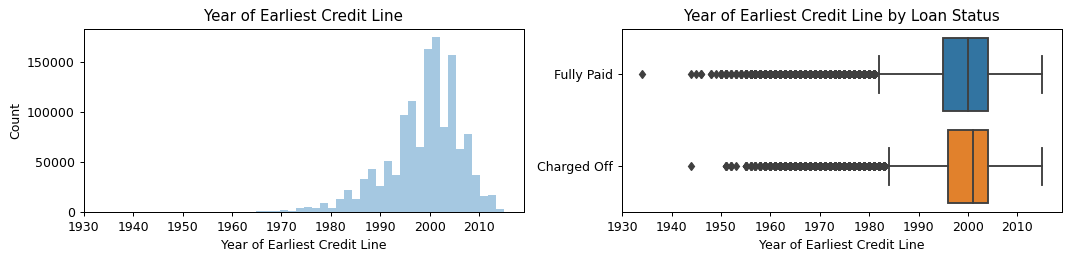

In [82]:
plot_var('earliest_cr_line', 'Year of Earliest Credit Line', continuous=True)

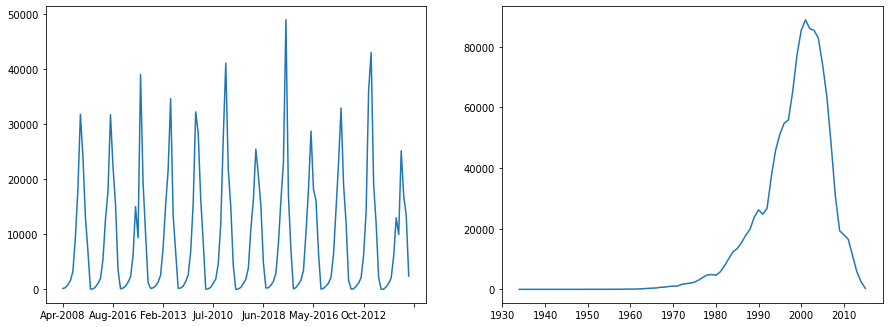

In [83]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
Accepted_data.issue_d.value_counts().sort_index().plot()

plt.subplot(2, 2, 2)
Accepted_data.earliest_cr_line.value_counts().sort_index().plot()

**purpose**

In [84]:
Accepted_data['purpose'].value_counts()

debt_consolidation    780321
credit_card           295279
home_improvement       87504
other                  77875
major_purchase         29425
medical                15554
small_business         15416
car                    14585
moving                  9480
vacation                9065
house                   7253
wedding                 2294
renewable_energy         933
educational              326
Name: purpose, dtype: int64

In [85]:
Accepted_data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121622
car                   0.146795
credit_card           0.169270
educational           0.171779
home_improvement      0.177158
major_purchase        0.185998
vacation              0.191726
other                 0.210401
debt_consolidation    0.211469
medical               0.217757
house                 0.218806
moving                0.233544
renewable_energy      0.236870
small_business        0.297094
Name: loan_status, dtype: float64

**Title**

In [86]:
Accepted_data['title'].describe()

count                1328651
unique                 61682
top       Debt consolidation
freq                  660960
Name: title, dtype: object

In [87]:
Accepted_data['title'] = Accepted_data.title.str.lower()

In [88]:
Accepted_data['title'].value_counts().head(10)

debt consolidation         682107
credit card refinancing    250295
home improvement            77604
other                       66862
major purchase              24334
medical expenses            13681
business                    11843
car financing               11245
vacation                     8233
moving and relocation        7952
Name: title, dtype: int64

In [89]:
Accepted_data.title.isna().sum()

16659

In [90]:
Accepted_data.drop('title', axis=1, inplace=True)

**zip_code, addr_state**

In [91]:
Accepted_data['zip_code'].sample(8)

1035455    921xx
330451     194xx
2136442    410xx
395728     951xx
98311      208xx
1677708    800xx
1941805    917xx
1112504    349xx
Name: zip_code, dtype: object

In [92]:
Accepted_data['zip_code'].nunique()

943

In [93]:
Accepted_data['addr_state'].sample(8)

1761233    GA
1756216    CA
1080292    FL
1023582    GA
1186961    TX
1629414    NC
1141399    TN
1185866    FL
Name: addr_state, dtype: object

In [94]:
Accepted_data['addr_state'].nunique()

51

In [95]:
Accepted_data.drop(labels='zip_code', axis=1, inplace=True)

In [96]:
Accepted_data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
DC    0.132086
ME    0.138424
VT    0.139517
IA    0.142857
OR    0.143850
NH    0.145759
WV    0.155187
CO    0.155269
WA    0.157565
SC    0.162769
KS    0.167438
WY    0.167693
MT    0.168716
UT    0.170586
CT    0.173763
RI    0.178675
IL    0.180974
WI    0.183510
GA    0.183927
ID    0.188277
MA    0.190528
CA    0.196104
AZ    0.196299
AK    0.196552
MN    0.197430
DE    0.197462
TX    0.198223
VA    0.199422
HI    0.202013
MI    0.202957
ND    0.204744
OH    0.205283
NC    0.207839
PA    0.207921
KY    0.209829
NJ    0.211212
MO    0.212935
MD    0.213085
SD    0.213227
NM    0.213665
TN    0.214079
IN    0.214082
FL    0.214746
NV    0.219223
NY    0.220435
LA    0.231821
OK    0.234753
AL    0.236321
AR    0.240868
NE    0.251813
MS    0.260777
Name: loan_status, dtype: float64

**dti**

In [97]:
Accepted_data['dti'].describe()

count    1.344936e+06
mean     1.828267e+01
std      1.116045e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64

In [98]:
Accepted_data.dti.value_counts()

18.00    995
19.20    991
14.40    971
16.80    951
15.60    918
        ... 
79.23      1
79.27      1
89.49      1
61.29      1
74.72      1
Name: dti, Length: 7067, dtype: int64

Text(0.5, 0, 'dti')

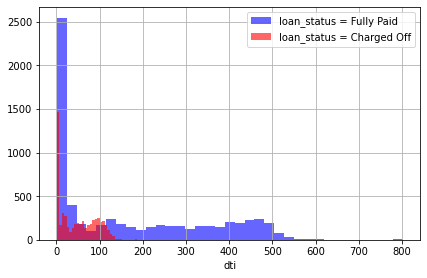

In [99]:
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
Accepted_data[Accepted_data["loan_status"] == "Fully Paid"]["dti"].value_counts().hist(bins=35, color='blue', 
                                                                     label='loan_status = Fully Paid', alpha=0.6)
Accepted_data[Accepted_data["loan_status"] == "Charged Off"]["dti"].value_counts().hist(bins=35, color='red', 
                                                                      label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("dti")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

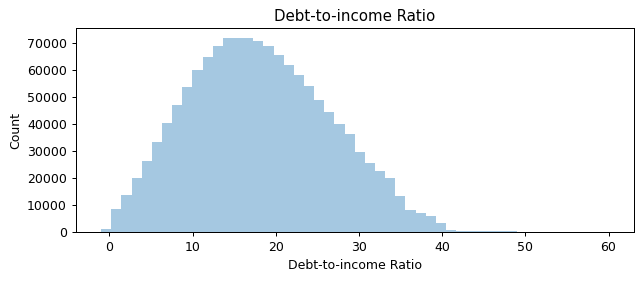

In [100]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(Accepted_data.loc[Accepted_data['dti'].notnull() & (Accepted_data['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [101]:
(Accepted_data['dti']>=60).sum()

1715

In [102]:
Accepted_data.groupby('loan_status')['dti'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268488.0,20.171196,11.831747,0.0,13.55,19.76,26.31,999.0
Fully Paid,1076448.0,17.811629,10.935927,-1.0,11.43,17.11,23.44,999.0


**open_acc, revol_util, & total_acc**

In [103]:
Accepted_data[Accepted_data.open_acc > 40].shape


(1211, 29)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Open Credit Lines')

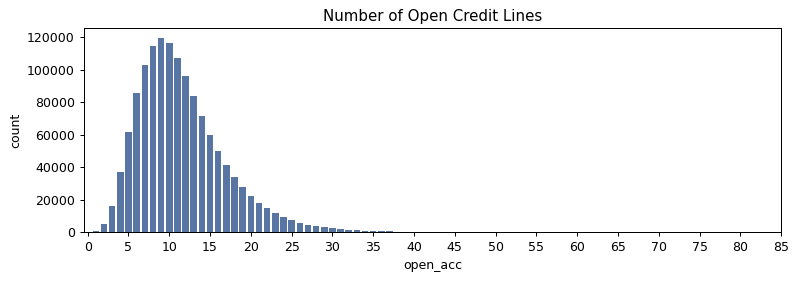

In [104]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(Accepted_data['open_acc'], order=sorted(Accepted_data['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [105]:
Accepted_data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,11.901269,5.637964,0.0,8.0,11.0,15.0,76.0
Fully Paid,1076751.0,11.516763,5.429354,0.0,8.0,11.0,14.0,90.0


In [106]:
Accepted_data[Accepted_data.total_acc > 80].shape

(1299, 29)

In [107]:
Accepted_data['revol_util'].describe()

count    1.344453e+06
mean     5.181002e+01
std      2.452107e+01
min      0.000000e+00
25%      3.340000e+01
50%      5.220000e+01
75%      7.070000e+01
max      8.923000e+02
Name: revol_util, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


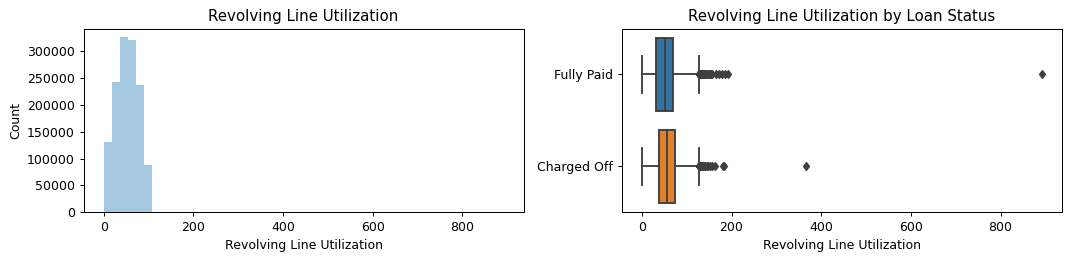

In [108]:
plot_var('revol_util', 'Revolving Line Utilization', continuous=True)

In [109]:
Accepted_data[Accepted_data.revol_util > 200]

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,log_annual_inc
1254597,16500.0,16500.0,60,14.49,388.14,C4,sales rep,0.0,MORTGAGE,Source Verified,Jun-2014,Charged Off,n,debt_consolidation,NC,9.33,1996,715.0,719.0,4.0,0.0,2566.0,366.6,15.0,f,Individual,0.0,0.0,4.681250
1292903,3500.0,3500.0,36,12.49,117.08,B4,Budget Analyst,10.0,RENT,Verified,Apr-2014,Fully Paid,n,debt_consolidation,CA,14.67,1998,695.0,699.0,2.0,0.0,2677.0,892.3,9.0,f,Individual,0.0,0.0,4.653222


In [110]:
Accepted_data.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268379.0,54.758433,23.865982,0.0,37.4,55.5,73.1,366.6
Fully Paid,1076074.0,51.074671,24.626821,0.0,32.5,51.3,70.1,892.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Number of Credit Lines')

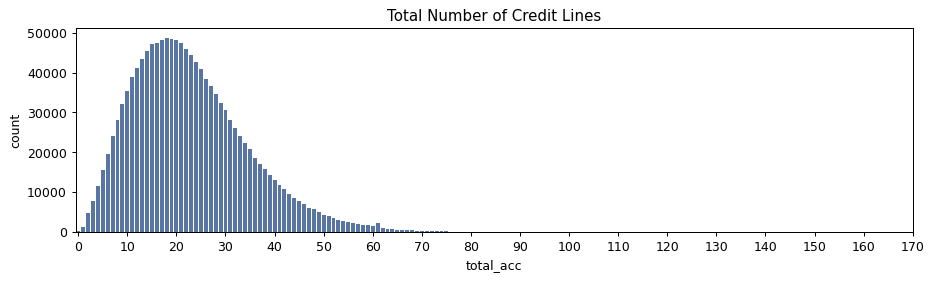

In [111]:
plt.figure(figsize=(12,3), dpi=90)
sns.countplot(Accepted_data['total_acc'], order=sorted(Accepted_data['total_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 176, 10), np.arange(0, 176, 10))
plt.title('Total Number of Credit Lines')

In [112]:
Accepted_data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,24.709356,12.117364,2.0,16.0,23.0,31.0,176.0
Fully Paid,1076751.0,25.048551,11.967683,2.0,16.0,23.0,32.0,162.0


Text(0.5, 0, 'revol_util')

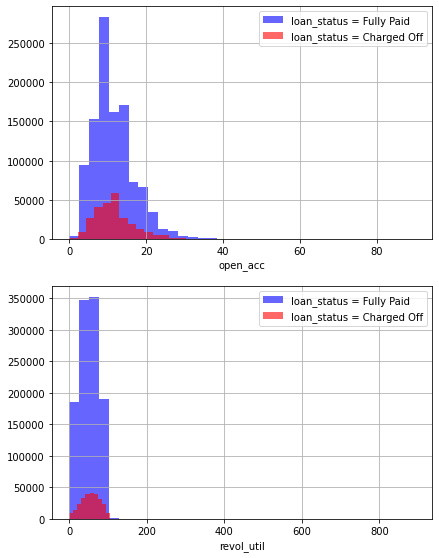

In [113]:
plt.figure(figsize=(15, 30))
plt.subplot(6, 2, 2)
Accepted_data[Accepted_data["loan_status"] == "Fully Paid"]["open_acc"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
Accepted_data[Accepted_data["loan_status"] == "Charged Off"]["open_acc"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("open_acc")

plt.subplot(6, 2, 4)
Accepted_data[Accepted_data["loan_status"] == "Fully Paid"]["revol_util"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
Accepted_data[Accepted_data["loan_status"] == "Charged Off"]["revol_util"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("revol_util")

**revol_bal**

error

**pub_rec**

In [114]:
Accepted_data['pub_rec'].value_counts().sort_index()

0.0     1117425
1.0      190789
2.0       24435
3.0        7399
4.0        2630
5.0        1266
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
14.0          5
15.0          9
16.0          5
17.0          3
18.0          6
19.0          5
20.0          3
21.0          6
22.0          2
23.0          1
24.0          2
25.0          1
28.0          3
34.0          1
37.0          1
40.0          1
46.0          1
47.0          1
49.0          2
54.0          1
61.0          1
63.0          1
86.0          1
Name: pub_rec, dtype: int64

In [115]:
Accepted_data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,0.246843,0.656732,0.0,0.0,0.0,0.0,86.0
Fully Paid,1076751.0,0.207403,0.587118,0.0,0.0,0.0,0.0,63.0


**fico_range_low, fico_range_high**

In [116]:
Accepted_data[['fico_range_low', 'fico_range_high']].describe()

,fico_range_low,fico_range_high
count,1.345310e+06,1.345310e+06
mean,6.961850e+02,7.001852e+02
std,3.185251e+01,3.185316e+01
min,6.250000e+02,6.290000e+02
25%,6.700000e+02,6.740000e+02
50%,6.900000e+02,6.940000e+02
75%,7.100000e+02,7.140000e+02
max,8.450000e+02,8.500000e+02


In [117]:
Accepted_data[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,689.850145,25.948737,662.0,672.0,682.0,702.0,847.5
Fully Paid,1076751.0,700.263982,32.834008,627.0,677.0,692.0,717.0,847.5


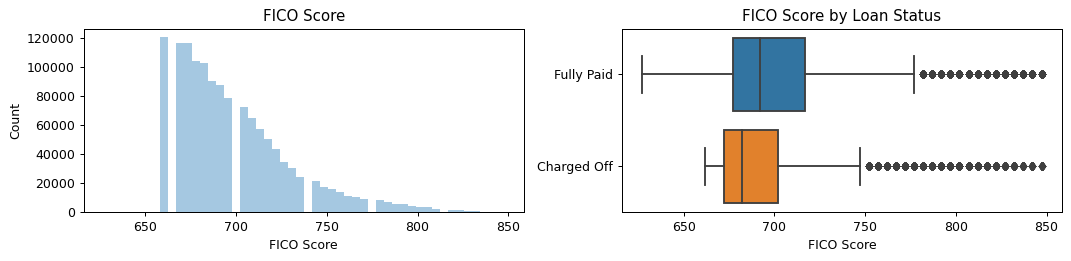

In [118]:
Accepted_data['fico_score'] = 0.5*Accepted_data['fico_range_low'] + 0.5*Accepted_data['fico_range_high']
Accepted_data.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)
plot_var('fico_score', 'FICO Score', continuous=True)
Accepted_data.groupby('loan_status')['fico_score'].describe()

**initial_list_status**

In [119]:
Accepted_data.initial_list_status.value_counts()

w    784010
f    561300
Name: initial_list_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


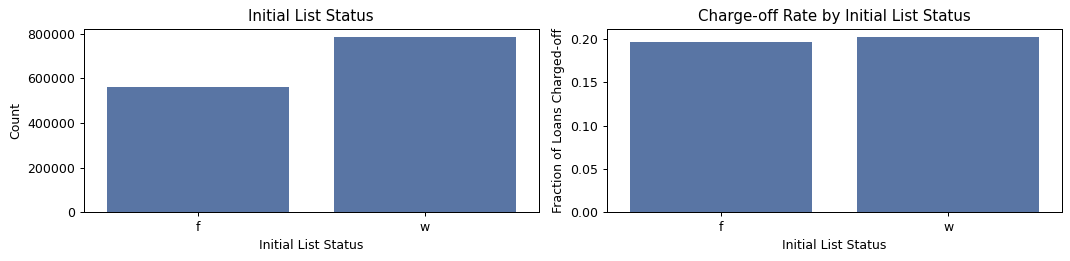

In [120]:
plot_var('initial_list_status', 'Initial List Status', continuous=False)

**application_type**

In [121]:
Accepted_data.application_type.value_counts()

Individual    1319510
Joint App       25800
Name: application_type, dtype: int64

In [122]:
Accepted_data.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

application_type
Individual    0.198721
Joint App     0.245891
Name: loan_status, dtype: float64

**mort_acc, & pub_rec_bankruptcies**

In [123]:
Accepted_data['mort_acc'].describe()

count    1.298029e+06
mean     1.670783e+00
std      2.000444e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

In [124]:
Accepted_data['mort_acc'].value_counts().head(10)

0.0    523837
1.0    226135
2.0    188941
3.0    139381
4.0     94920
5.0     57632
6.0     32539
7.0     16850
8.0      8378
9.0      4285
Name: mort_acc, dtype: int64

In [125]:
Accepted_data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261673.0,1.371032,1.825505,0.0,0.0,1.0,2.0,29.0
Fully Paid,1036356.0,1.746468,2.035279,0.0,0.0,1.0,3.0,51.0


In [126]:
Accepted_data['pub_rec_bankruptcies'].value_counts().sort_index()

0.0     1176953
1.0      157696
2.0        7769
3.0        1583
4.0         396
5.0         141
6.0          46
7.0          15
8.0           9
9.0           3
11.0          1
12.0          1
Name: pub_rec_bankruptcies, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


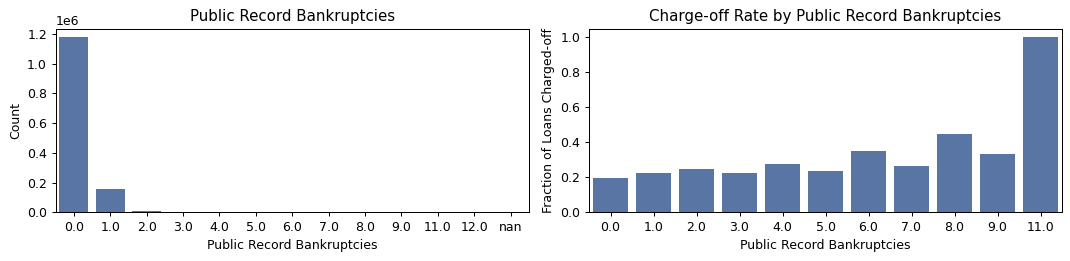

In [127]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankruptcies', continuous=False)

In [128]:
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [129]:
Accepted_data['mort_acc'] = Accepted_data.mort_acc.apply(mort_acc)
Accepted_data['pub_rec_bankruptcies'] = Accepted_data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

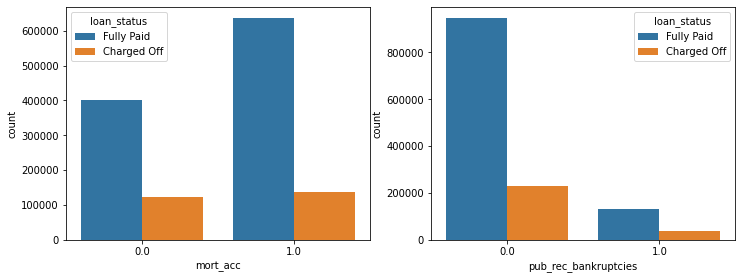

In [130]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='mort_acc', data=Accepted_data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='pub_rec_bankruptcies', data=Accepted_data, hue='loan_status')


We have completed with basic processing and EDA part of both Accepted and Rejected Dataset

**More Pre-processing**

**How numeric features correlate with the target variable?**

In [131]:
Accepted_data['loan_status'] = Accepted_data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

**Convert loan status to 0/1 charge-off indicator**

In [ ]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [133]:
Accepted_data.shape

(1345310, 28)

In [134]:
missing_fractions = Accepted_data.isnull().mean().sort_values(ascending=False)

In [135]:
print(missing_fractions[missing_fractions > 0])

emp_title               0.063766
emp_length              0.058359
mort_acc                0.035145
revol_util              0.000637
pub_rec_bankruptcies    0.000518
dti                     0.000278
dtype: float64


In [136]:
print(Accepted_data.columns)

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'log_annual_inc', 'fico_score',
       'charged_off'],
      dtype='object')


In [137]:
Accepted_data = pd.get_dummies(Accepted_data, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type'], drop_first=True)

In [138]:
Accepted_data.shape

(1345310, 125)

In [139]:
Accepted_data.sample(5)

,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,issue_d,pymnt_plan,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,log_annual_inc,fico_score,charged_off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,...,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
481151,24000.0,24000.0,60,13.59,553.35,Truck Driver,6.0,Feb-2018,n,19.65,1980,9.0,0.0,4209.0,27.0,19.0,0.0,0.0,4.748196,732.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2237671,5975.0,5975.0,36,24.74,236.75,Security,5.0,Oct-2016,n,27.95,2000,9.0,0.0,14012.0,65.8,15.0,0.0,0.0,4.272561,707.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1657887,7000.0,7000.0,36,12.74,234.99,region manager,10.0,Mar-2017,n,10.10,2005,11.0,0.0,1120.0,38.6,15.0,1.0,0.0,4.826081,677.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
129943,21000.0,21000.0,36,9.99,677.52,Director,0.0,Sep-2015,n,13.32,1989,7.0,0.0,46319.0,95.9,22.0,1.0,0.0,5.361730,732.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1185958,20000.0,20000.0,36,13.35,677.26,NaN,NaN,Oct-2014,n,22.61,2002,11.0,0.0,16623.0,58.7,16.0,1.0,0.0,4.698979,717.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Train\Test Split**

In [140]:
Accepted_data['issue_d'].sample(5)


1069952    Feb-2016
1109374    Jan-2016
704307     May-2016
537337     Sep-2017
1119731    Dec-2014
Name: issue_d, dtype: object

In [141]:
Accepted_data['issue_d'].isnull().any()

False

In [142]:
Accepted_data['issue_d'] = pd.to_datetime(Accepted_data['issue_d'])

In [143]:
Accepted_data['issue_d'].sample(5)

1038086   2016-03-01
739648    2016-04-01
581611    2017-08-01
85396     2015-10-01
1288029   2014-04-01
Name: issue_d, dtype: datetime64[ns]

In [144]:
Accepted_data['issue_d'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1345310
unique                    139
top       2016-03-01 00:00:00
freq                    48937
first     2007-06-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

Text(0.5, 1.0, 'Loans Funded per Year')

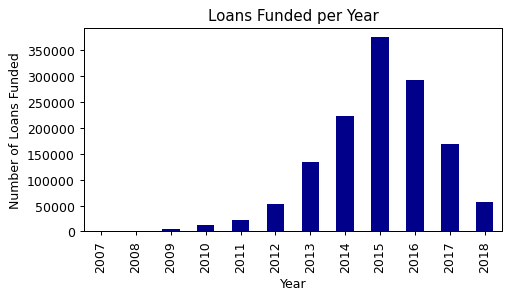

In [145]:
plt.figure(figsize=(6,3), dpi=90)
Accepted_data['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

In [149]:
w_p = Accepted_data.issue_d.value_counts()[0] / Accepted_data.shape[0]
w_n = Accepted_data.issue_d.value_counts()[1] / Accepted_data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.03637600255703147
Weight of negative values 0.03195248678743189


In [152]:

Ac_train = Accepted_data.loc[Accepted_data['issue_d'] <  Accepted_data['issue_d'].quantile(0.9)]
Ac_test =  Accepted_data.loc[Accepted_data['issue_d'] >= Accepted_data['issue_d'].quantile(0.9)]

In [153]:
print('Number of loans in the partition:   ', Ac_train.shape[0] + Ac_test.shape[0])
print('Number of loans in the full dataset:', Accepted_data.shape[0])

Number of loans in the partition:    1345310
Number of loans in the full dataset: 1345310


In [154]:
Ac_test.shape[0] / Accepted_data.shape[0]

0.11111639696426846

In [155]:
del Accepted_data

In [156]:
Ac_train['issue_d'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1195824
unique                    120
top       2016-03-01 00:00:00
freq                    48937
first     2007-06-01 00:00:00
last      2017-05-01 00:00:00
Name: issue_d, dtype: object

In [157]:
Ac_train.drop('issue_d', axis=1, inplace=True)
Ac_test.drop('issue_d', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [158]:
y_train = Ac_train['charged_off']
y_test = Ac_test['charged_off']

In [160]:
X_train = Ac_train.drop('charged_off', axis=1)
X_test = Ac_test.drop('charged_off', axis=1)

In [161]:
del Ac_train, Ac_test

**Linear Dependency**

In [162]:
linear_dep = pd.DataFrame()

**Model Building**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")